# 第3章例3.1的重现

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


C:\Users\bangu_000\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv("ex3_1.csv")

In [4]:
df.head()

,Year,PCE(Y),GDP(X)
0,1960.0,1597.4,2501.8
1,1961.0,1630.3,2560.0
2,1962.0,1711.1,2715.2
3,1963.0,1781.6,2834.0
4,1964.0,1888.4,2998.6


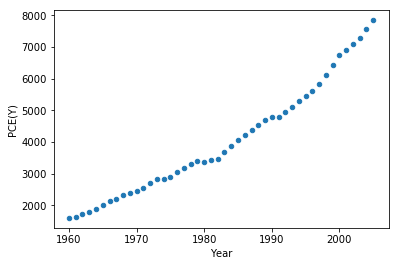

In [8]:
df.plot.scatter(x="Year", y='PCE(Y)')

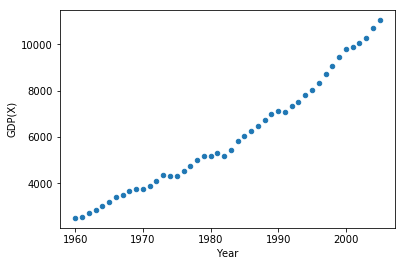

In [9]:
df.plot.scatter(x="Year", y="GDP(X)")

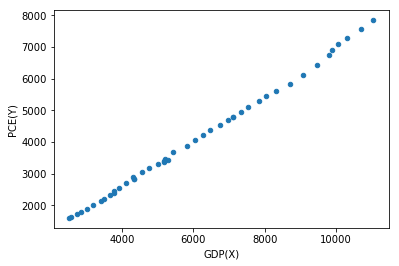

In [10]:
df.plot.scatter(x="GDP(X)", y="PCE(Y)")

可见`GDP(X)`与`PCE(Y)`之间存在线性关系，因此做线性回归：

In [17]:
mod=sm.OLS(df['PCE(Y)'], df['GDP(X)'])

In [18]:
res=mod.fit()

查看线性拟合的结果，教科书上线性系数是0.7218：

In [19]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                 PCE(Y)   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 4.893e+04
Date:                Sun, 18 Jun 2017   Prob (F-statistic):           5.57e-70
Time:                        00:24:28   Log-Likelihood:                -290.55
No. Observations:                  46   AIC:                             583.1
Df Residuals:                      45   BIC:                             584.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
GDP(X)         0.6792      0.003    221.204      0.0

In [20]:
print res.summary2()

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.999    
Dependent Variable: PCE(Y)           AIC:                583.1010 
Date:               2017-06-18 00:26 BIC:                584.9296 
No. Observations:   46               Log-Likelihood:     -290.55  
Df Model:           1                F-statistic:        4.893e+04
Df Residuals:       45               Prob (F-statistic): 5.57e-70 
R-squared:          0.999            Scale:              18338.   
--------------------------------------------------------------------
             Coef.    Std.Err.      t       P>|t|    [0.025   0.975]
--------------------------------------------------------------------
GDP(X)       0.6792     0.0031   221.2038   0.0000   0.6730   0.6853
------------------------------------------------------------------
Omnibus:               23.957       Durbin-Watson:          0.088 
Prob(Omnibus):         0.000        Jarque-Bera (JB):       34.943
Skew

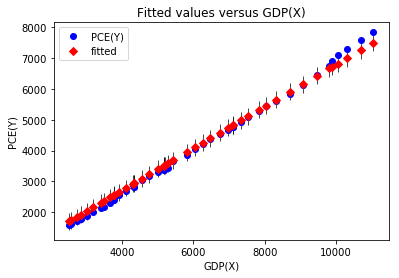

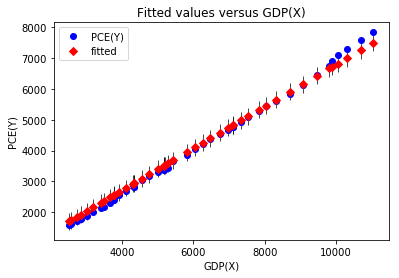

In [21]:
sm.graphics.plot_fit(res, 0)